# Jupyter Notebook Visualisation

## Abstract

# Image Classifier and Test

# Evaluation Images 

### Importing needed tools

In [1]:
import skimage
import numpy as np
import matplotlib.pyplot as plt

### Creating Test Images

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  102.  92.   0.   0.   0.   0.   0.   0.   0.   0.   0.  

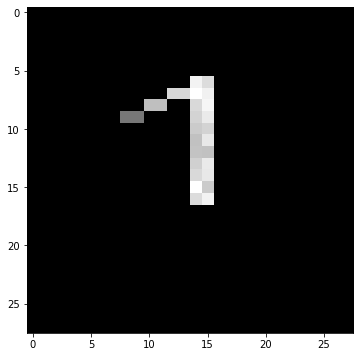

In [2]:
img_one = np.zeros([28, 28])
img_one[ 7:8, 12:16] = 90
img_one[ 8:9, 10:12] = 80 
img_one[ 9:10, 8:10] = 50 
img_one[ 6:17, 14:16] = 110 - np.random.randint(30, size=(11, 2))
print(img_one)
plt.figure('object', figsize=(10,6))
plt.imshow(img_one, cmap='gray')

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  

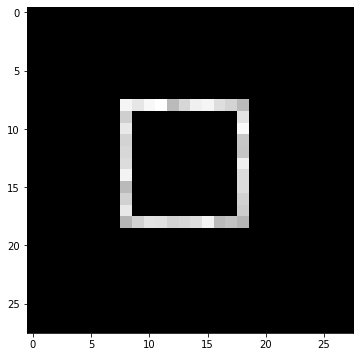

In [3]:
img_not_one = np.zeros([28, 28]) 
img_not_one [ 8:18, 8:9] = 100 - np.random.randint(30, size=(10, 1))
img_not_one [ 8:18, 18:19] = 100 - np.random.randint(30, size=(10, 1))
img_not_one [ 8:9, 8:19] = 100 - np.random.randint(30, size=(1, 11))
img_not_one [ 18:19, 8:19] = 100 - np.random.randint(30, size=(1, 11))
print(img_not_one)
plt.figure('object', figsize=(10,6))
plt.imshow(img_not_one , cmap='gray')

### Images are unrealistic, we can perform Morphological Image Operation to provide more realistic images

However morphological opening is defined in skimage module, we can perform that from scratch as erosion of dilation of image as define in "Morphological Image Analysis" Pierre Soile 

For structuring element B and set X, for:

Erosion define as:
<br>
$ \large \varepsilon_B(X) = { x | B_x \subseteq X}  $

Dilation define as:
<br>
$ \large \delta_B(X) = { x | B_x \cap X \neq \emptyset}  $

Closing of image f is defined as:
<br>
$ \large  \oslash_B(f) = \varepsilon_{\breve{B}}[\delta_B(X)] $

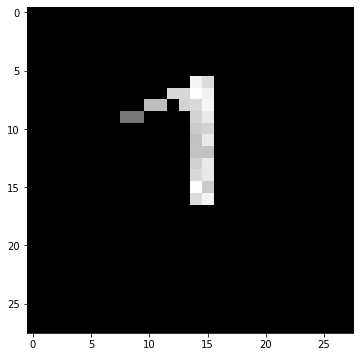

In [4]:
img_one = skimage.morphology.erosion(skimage.morphology.dilation(img_one))
plt.figure('object', figsize=(10,6))
plt.imshow(img_one , cmap='gray') 

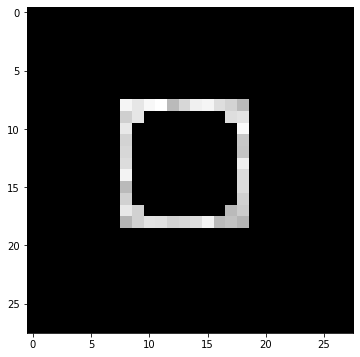

In [5]:
img_not_one = skimage.morphology.closing(img_not_one)
plt.figure('object', figsize=(10,6))
plt.imshow(img_not_one , cmap='gray') 

## Image Augmentation

Augmentation is the technique in machine learning helpful in overfitting reducing by using the amount of operation done on data. In image cases, the most popular are horizontal flips, random noises and colour inversions. 
<br> In our task we will use image augmentation only for the test task.
<br> We will use only colour inversion function because we want our classifier to recognise images of all colours, however, we don't want to treat standard and flipped numbers as the same (except for "0", "8") 

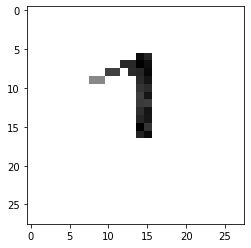

In [6]:
from skimage import util
augmented = util.invert(img_one)
plt.imshow(augmented, cmap='gray')

## Presented Class

In [7]:
class Test_Image:
    def __int__(self):
        self.is_one = []
        self.is_not_one = []
        self.augmented_one = []
        self.augmented_non_one = []
    def is_one(self):
        #Image declaration
        img_one = np.zeros([28, 28])
        img_one[ 7:8, 12:16] = 90
        img_one[ 8:9, 10:12] = 80 
        img_one[ 9:10, 8:10] = 50 
        img_one[ 6:17, 14:16] = 110 - np.random.randint(30, size=(11, 2))
        # To make Image more realistic we performe erosion of dilation of image
        self.img_one = skimage.morphology.erosion(skimage.morphology.dilation(img_one))
        return self.img_one
    def is_not_one(self):
        # Image declaration
        img_not_one = np.zeros([28, 28]) 
        img_not_one [ 8:18, 8:9] = 100 - np.random.randint(30, size=(10, 1))
        img_not_one [ 8:18, 18:19] = 100 - np.random.randint(30, size=(10, 1))
        img_not_one [ 8:9, 8:19] = 100 - np.random.randint(30, size=(1, 11))
        img_not_one [ 18:19, 8:19] = 100 - np.random.randint(30, size=(1, 11))
        # To make Image more realistic we performe erosion of dilation of image
        self.img_not_one = skimage.morphology.closing(img_not_one)
        return self.img_not_one
    def image_augmentation(self):
        #Augmentation - Colour Inversion
        self.augmented_one = util.invert(self.img_one)
        self.augmented_non_one = util.invert(self.img_not_one)
        return self.augmented_one, self.augmented_non_one

# Data Set

The MNIST (70000, 28 x 28) data set will be downloaded by TensorFlow.keras module, which provides us access to bigger data sets with higher quality data than sklearn.digits (1797, 8×8)

In [8]:
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split

Standard splitting for training and test data, what's more, necessary data reshape

In [9]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)
print(X_test.shape)
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

(60000, 28, 28)
(10000, 28, 28)


example of data set instance

(-0.5, 27.5, 27.5, -0.5)

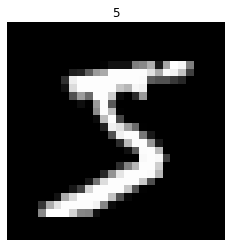

In [10]:
plt.imshow(X_train[0].reshape(28,28), cmap='gray')
plt.title(y_train[0])
plt.axis('off')

# First Model - Naive Bayes Classifier

Naive Bayes Classifier given by following formmula:

$ \Large P(y|x_1, ..., x_n) =  \frac{P(y)P(x_1,...,x_n|y)}{P(x_1,...,x_n)}$

Text(0.5, 0, 'Label')

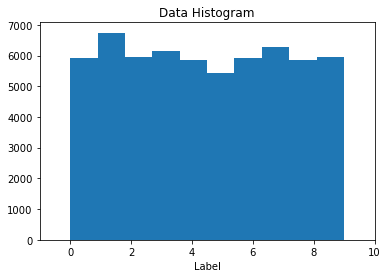

In [11]:
plt.hist(y_train)
plt.title('Data Histogram')
plt.xlim([-1, 10])
plt.xlabel("Label")

In [12]:
from sklearn.naive_bayes import MultinomialNB 
Bayesian = MultinomialNB()

In [13]:
Bayesian.fit(X_train, y_train)

MultinomialNB()

# Tests

[1]


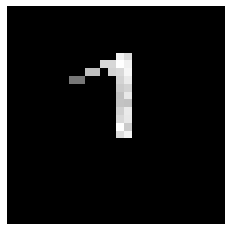

In [14]:
plt.imshow(img_one, cmap='gray')
plt.axis('off')
y_pred = Bayesian.predict(img_one.reshape(784).reshape(1, -1))
print(y_pred)

As we see our Bayes Classifier correctly classified "1"

[9]


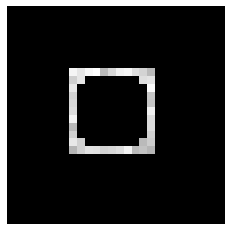

In [15]:
plt.imshow(img_not_one, cmap='gray')
plt.axis('off')
y_pred = Bayesian.predict(img_not_one.reshape(784).reshape(1, -1))
print(y_pred)

As we see our Bayes Classifier incorrectly classified "0"

In [16]:
test = Test_Image()
img_1 = test.is_one()
img_2 = test.is_not_one()
aug_1, aug_0 = test.image_augmentation()

[1]


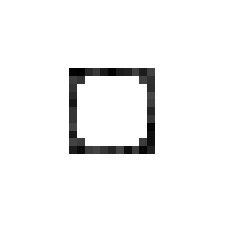

In [17]:
plt.imshow(aug_0, cmap='gray')
plt.axis('off')
y_pred = Bayesian.predict(aug_0.reshape(784).reshape(1, -1))
print(y_pred)

[0]


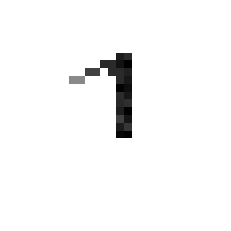

In [18]:
plt.imshow(aug_1, cmap='gray')
plt.axis('off')
y_pred = Bayesian.predict(aug_1.reshape(784).reshape(1, -1))
print(y_pred)

Here we can see that our classifier cannot correctly classify augmented (colour inversion) image

## Model I evaluation

In [19]:
from sklearn.metrics import confusion_matrix
results = confusion_matrix(y_test, Bayesian.predict(X_test))

normalisation

In [20]:
rows = results.sum(axis=1, keepdims=True)
results = results/rows

removing diagonal part 

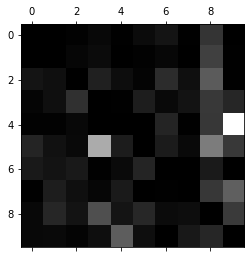

In [21]:
np.fill_diagonal(results, 0)
plt.matshow(results, cmap='gray')

We can assume our classifier is definitely not perfect and not satisfying, we can even realise that, our classifier is not able to correctly recognise 4 and 9and 5 with 3

# Model I - Convolutional Neural Network

# References

Pierre Soile, Morphological Image Analysis
Principles and Applications: https://link.springer.com/book/10.1007/978-3-662-03939-7

MNIST Dataset: http://yann.lecun.com/exdb/mnist/